In [11]:
import torch.nn.functional as F
import torchvision

from optimizers.adamm import *
import torchvision.transforms as transforms
import torch.optim as optim
import torch.nn as nn

import matplotlib.pyplot as plt

plt.rcParams["figure.figsize"] = (14,12)

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
class SmallModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(1, 3, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(3, 9, 3)
        self.fc1 = nn.Linear(9 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = torch.flatten(x, 1)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

In [3]:
transform = transforms.Compose([transforms.ToTensor()])

mnist_dataset_train = torchvision.datasets.MNIST('data/mnist/', download=False, train=True, transform=transform)
train_loader = torch.utils.data.DataLoader(mnist_dataset_train, batch_size=4)

mnist_dataset_test = torchvision.datasets.MNIST('data/mnist/', download=False, train=False, transform=transform)
test_loader = torch.utils.data.DataLoader(mnist_dataset_train, batch_size=4)

criterion = nn.CrossEntropyLoss()

nb_epochs = 10

In [8]:
def train(model, optimizer, criterion, nb_epochs, train_loader, test_loader):
    # Heavily inspired from PyTorch tutorial
    train_losses = []
    test_accuracies = []

    running_loss = 0

    for e in range(nb_epochs):

        for i, data in enumerate(train_loader):
            inputs, labels = data

            optimizer.zero_grad()
            outputs = model(inputs)
            #print(outputs)
            loss = criterion(outputs, labels)
            #print(loss)
            loss.backward()

            optimizer.step()
            #print(loss)
            #print('-----------------')

            running_loss += loss.item()

            if i % 2000 == 1999:
                train_losses.append(running_loss / 1000)
                print(f'epoch : {e + 1}/{nb_epochs} | train loss : {train_losses[-1]:.4f}')
                running_loss = 0.0

        with torch.no_grad():
            correct_preds = 0
            total_preds = 0

            for inputs, labels in test_loader:
                outputs = model(inputs)

                predictions = torch.argmax(outputs, 1)
                total_preds += labels.size(0)
                correct_preds += (predictions == labels).sum().item()

            test_accuracies.append(correct_preds / total_preds)

    return train_losses, test_accuracies

In [10]:
small_model = SmallModel()

optimizer_pt = optim.Adam(small_model.parameters(), lr=1e-3, betas=(0.9, 0.999), eps=1e-8, amsgrad=True)

train_losses_pt, test_acc_pt = train(small_model, optimizer_pt, criterion, nb_epochs, train_loader, test_loader)

epoch : 1/10 | train loss : 1.0280
epoch : 1/10 | train loss : 0.3956
epoch : 1/10 | train loss : 0.2752
epoch : 1/10 | train loss : 0.2348
epoch : 1/10 | train loss : 0.2081
epoch : 1/10 | train loss : 0.2097
epoch : 1/10 | train loss : 0.1957
epoch : 2/10 | train loss : 0.2320
epoch : 2/10 | train loss : 0.1659
epoch : 2/10 | train loss : 0.1309
epoch : 2/10 | train loss : 0.1286
epoch : 2/10 | train loss : 0.1296
epoch : 2/10 | train loss : 0.1313
epoch : 2/10 | train loss : 0.1277
epoch : 3/10 | train loss : 0.1611
epoch : 3/10 | train loss : 0.1136
epoch : 3/10 | train loss : 0.0915
epoch : 3/10 | train loss : 0.0910
epoch : 3/10 | train loss : 0.1003
epoch : 3/10 | train loss : 0.0985
epoch : 3/10 | train loss : 0.0924
epoch : 4/10 | train loss : 0.1307
epoch : 4/10 | train loss : 0.0779
epoch : 4/10 | train loss : 0.0688
epoch : 4/10 | train loss : 0.0717
epoch : 4/10 | train loss : 0.0835
epoch : 4/10 | train loss : 0.0792
epoch : 4/10 | train loss : 0.0726
epoch : 5/10 | train

In [9]:
small_model = SmallModel()

optimizer_custom = AdaMM(small_model.parameters(), lr=1e-3, beta1=0.9, beta2=0.999, epsilon=1e-8)

train_losses_custom, test_acc_custom = train(small_model, optimizer_custom, criterion, nb_epochs, train_loader, test_loader)

epoch : 1/10 | train loss : 0.6676
epoch : 1/10 | train loss : 0.2880
epoch : 1/10 | train loss : 0.2139
epoch : 1/10 | train loss : 0.2202
epoch : 1/10 | train loss : 0.1932
epoch : 1/10 | train loss : 0.2047
epoch : 1/10 | train loss : 0.1719
epoch : 2/10 | train loss : 0.2117
epoch : 2/10 | train loss : 0.1477
epoch : 2/10 | train loss : 0.1179
epoch : 2/10 | train loss : 0.1455
epoch : 2/10 | train loss : 0.1303
epoch : 2/10 | train loss : 0.1406
epoch : 2/10 | train loss : 0.1254
epoch : 3/10 | train loss : 0.1596
epoch : 3/10 | train loss : 0.1101
epoch : 3/10 | train loss : 0.0936
epoch : 3/10 | train loss : 0.1125
epoch : 3/10 | train loss : 0.1067
epoch : 3/10 | train loss : 0.1128
epoch : 3/10 | train loss : 0.1054
epoch : 4/10 | train loss : 0.1278
epoch : 4/10 | train loss : 0.0914
epoch : 4/10 | train loss : 0.0783
epoch : 4/10 | train loss : 0.0937
epoch : 4/10 | train loss : 0.0877
epoch : 4/10 | train loss : 0.0991
epoch : 4/10 | train loss : 0.0877
epoch : 5/10 | train

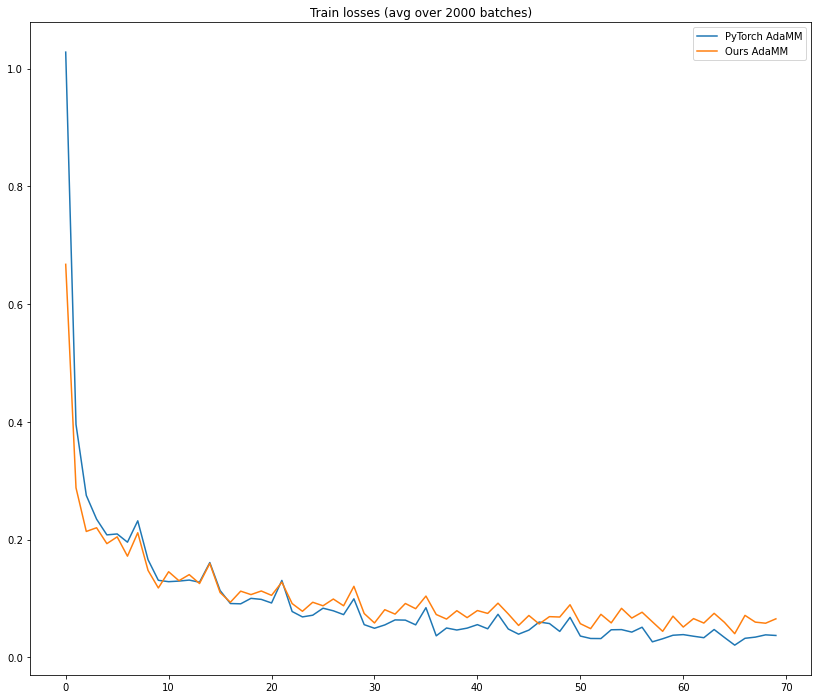

In [13]:
plt.plot(train_losses_pt, label='PyTorch AdaMM')
plt.plot(train_losses_custom, label='Ours AdaMM')
plt.title('Train losses (avg over 2000 batches)')
plt.legend()
plt.show()

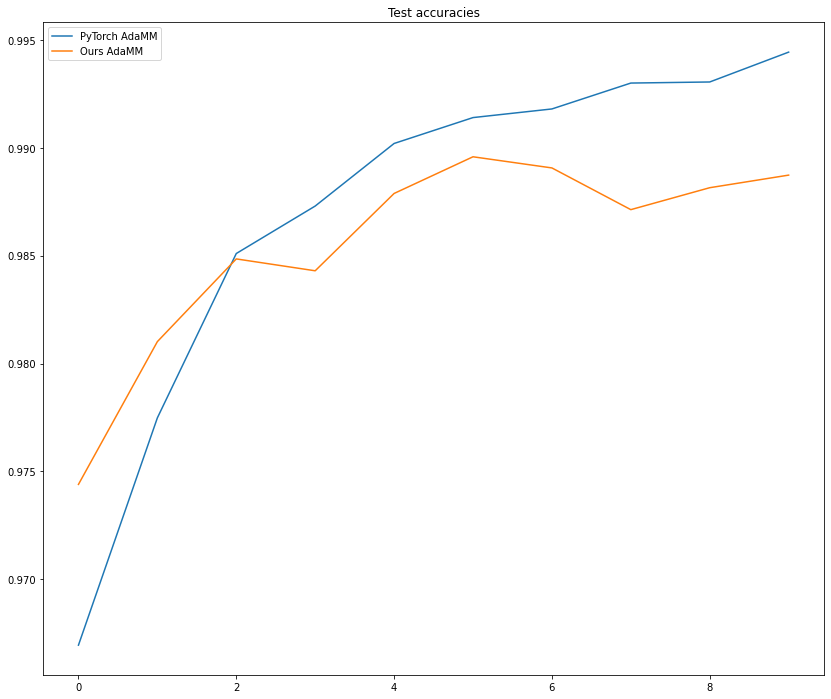

In [14]:
plt.plot(test_acc_pt, label='PyTorch AdaMM')
plt.plot(test_acc_custom, label='Ours AdaMM')
plt.title('Test accuracies')
plt.legend()
plt.show()